# The Big Picture
- We would like to predict if investing in the housing market of Ames, Iowa has an acceptable ROI
- Model selection:
  - Supervised Learning
    - Regression
      - Types of regression to evaluate
        - Random Forest
        - Linear Regression
        - Gradient Boosted
- Performance Measure:
  - RMSE
- Check Assumptions:
  - There are many factors that influence home prices
  - Goal is t predict the sales price for each house (SalesPrice)

In [495]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [496]:
# Get the data
df_train = pd.read_csv("./data/house-prices-advanced-regression-techniques/train.csv")

In [497]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [498]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [499]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

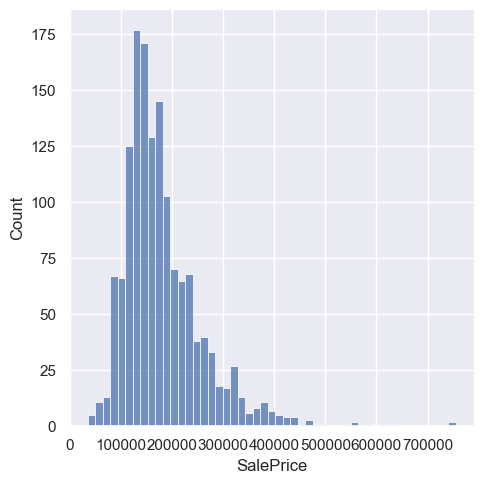

In [500]:
sns.displot(df_train["SalePrice"])

In [501]:
print("Skew: %f" % df_train["SalePrice"].skew())
print("Kurtosis: %f" % df_train["SalePrice"].kurt())

Skew: 1.882876
Kurtosis: 6.536282


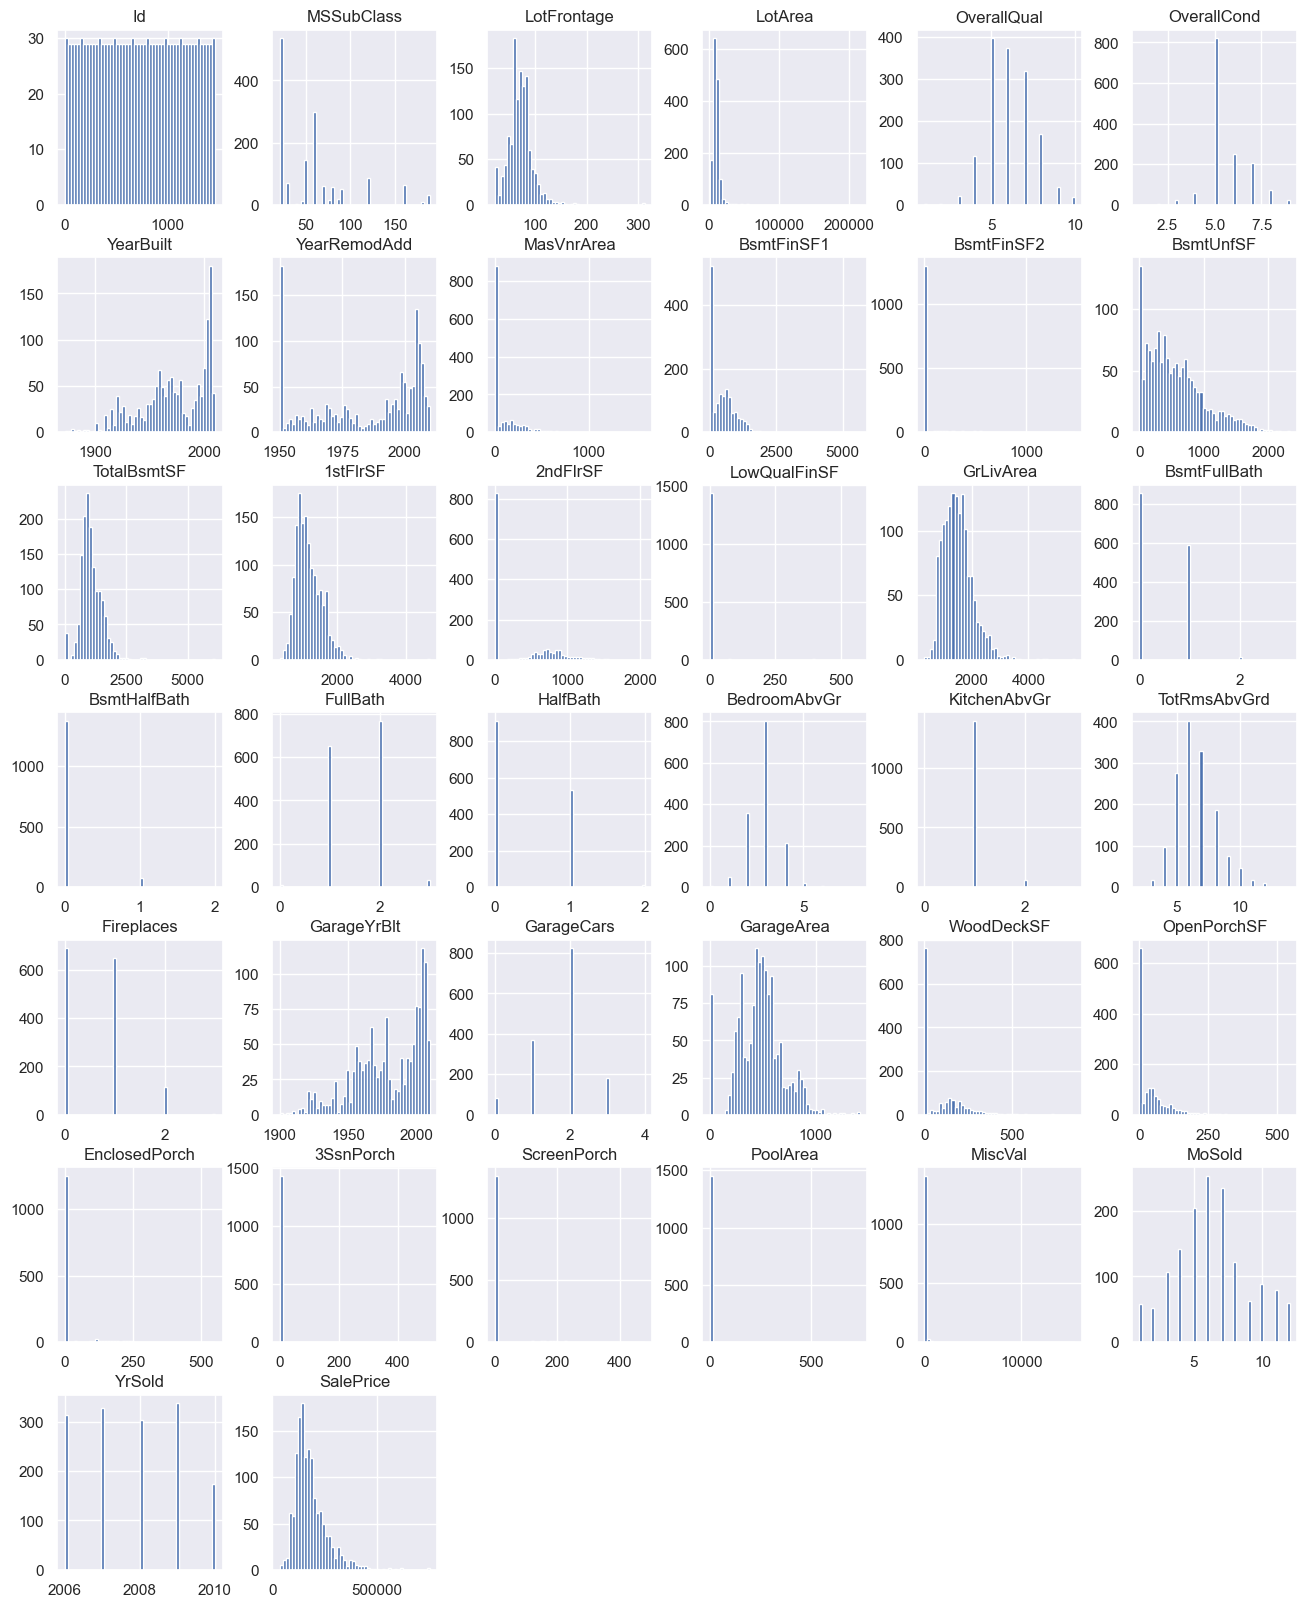

In [502]:
df_train.hist(bins=50, figsize=(16, 20))

plt.show()

## What We Learn From the Data
- Most homes sell for less than $500,000
- Most homes were recently built
- Most homes were recently remodeled

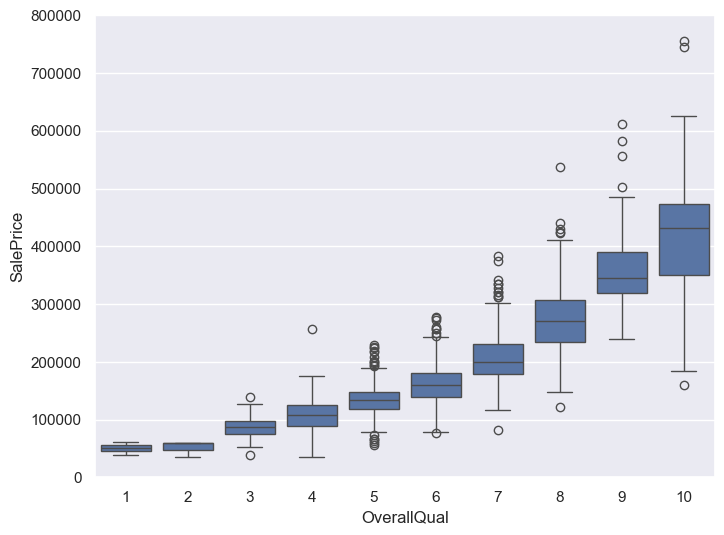

In [503]:
var = "OverallQual"
data = pd.concat([df_train["SalePrice"], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

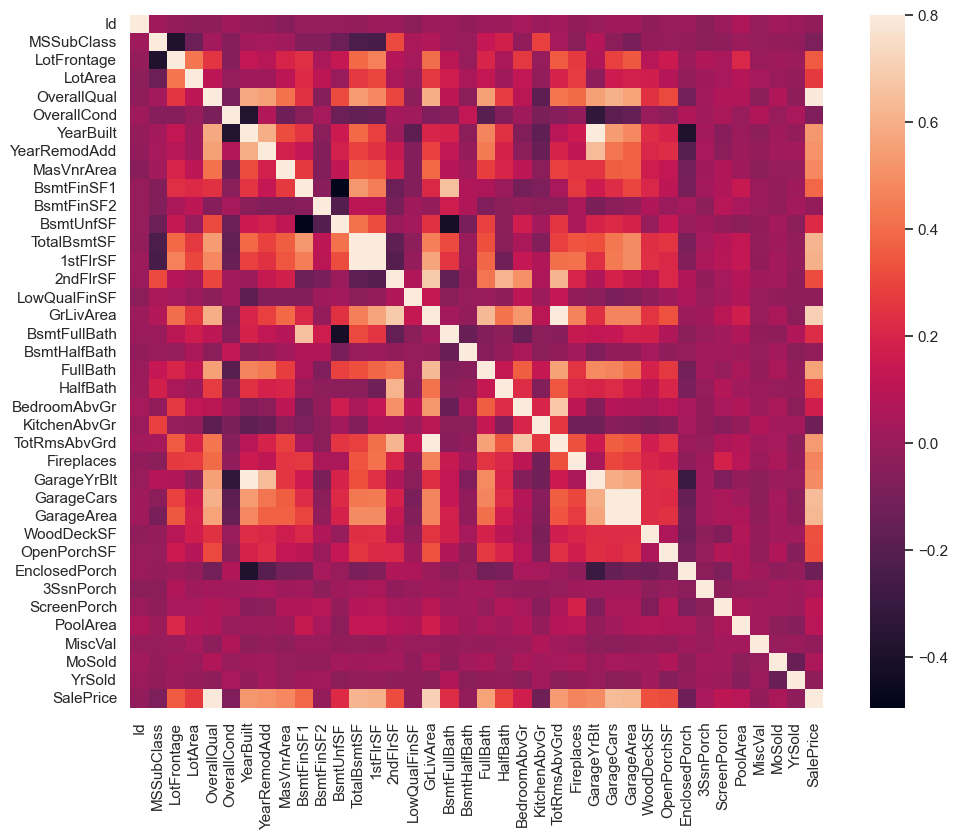

In [504]:
numeric_df = df_train.select_dtypes(include=[float, int])

corr_matrix = numeric_df.corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=0.8, square=True)
plt.show()

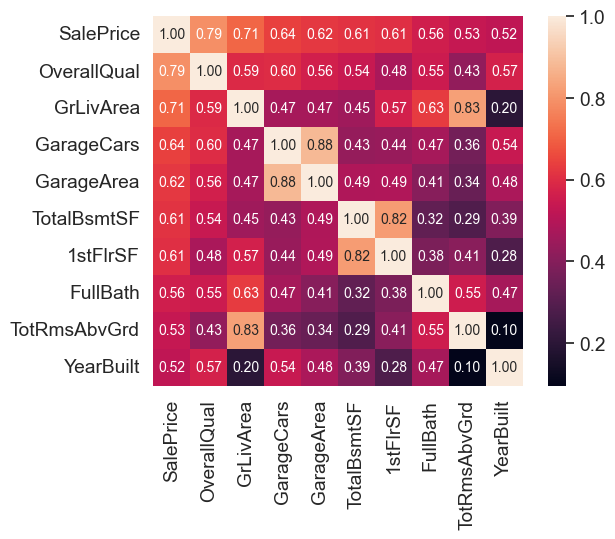

In [505]:
# Experiment With Attribute Combinations
k = 10  # number of variables for heatmap
cols = corr_matrix.nlargest(k, "SalePrice")["SalePrice"].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt=".2f",
    annot_kws={"size": 10},
    yticklabels=cols.values,
    xticklabels=cols.values,
)
plt.show()

/Users/dalt353/Library/CloudStorage/OneDrive-PNNL/Documents/GitHub/ml_practice/.env/lib/python3.10/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


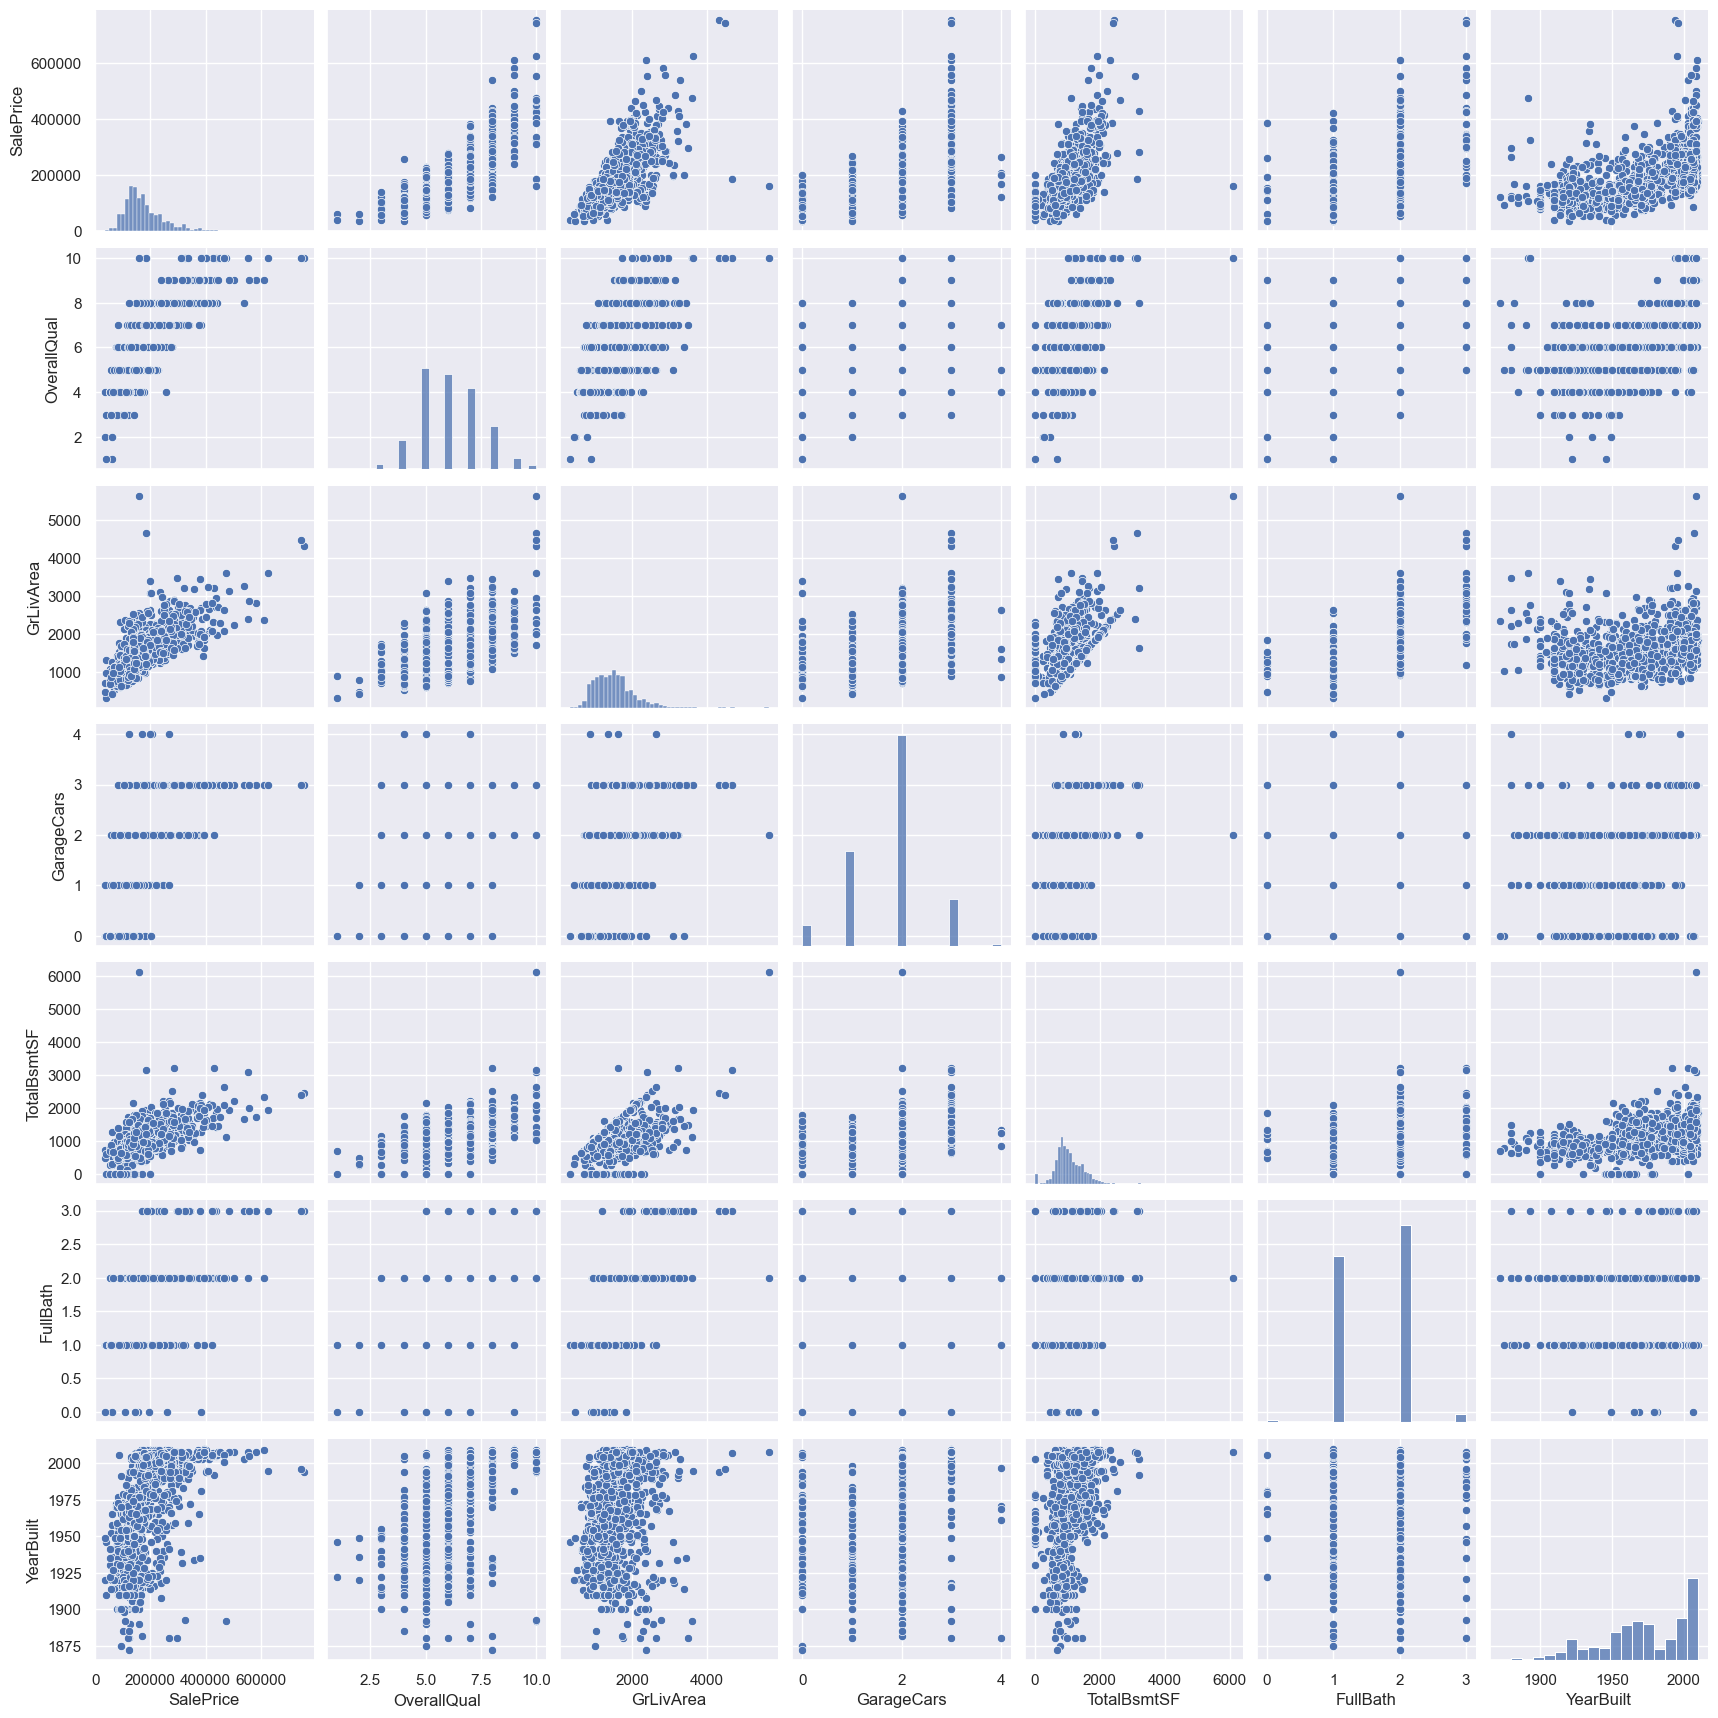

In [506]:
sns.set()
cols = [
    "SalePrice",
    "OverallQual",
    "GrLivArea",
    "GarageCars",
    "TotalBsmtSF",
    "FullBath",
    "YearBuilt",
]
sns.pairplot(df_train[cols], size=2.5)
plt.show();

In [507]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = ((df_train.isnull().sum() / df_train.isnull().count()) * 100).sort_values(
    ascending=False
)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945


In [508]:
df_train = pd.get_dummies(df_train.drop("Id", axis=1))

In [509]:
df_train = df_train.dropna()
print(f"Total Missing Values: {df_train.isnull().sum().max()}")

Total Missing Values: 0


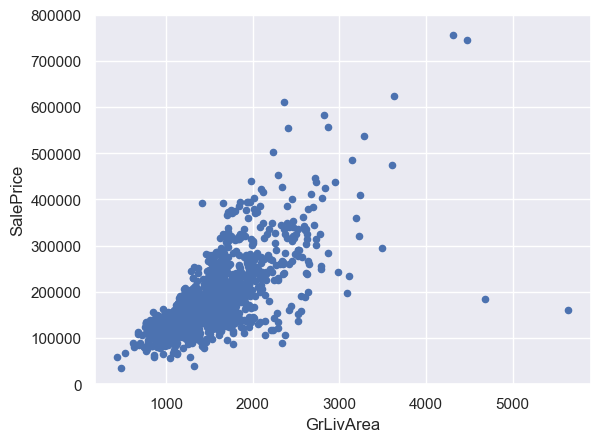

In [510]:
var = "GrLivArea"
data = pd.concat([df_train["SalePrice"], df_train[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0, 800000));

In [511]:
df_train.sort_values(by="GrLivArea", ascending=False)[:2]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1298,60,313.0,63887,10,5,2008,2008,796.0,5644,0,...,False,True,False,False,False,False,False,False,False,True
523,60,130.0,40094,10,5,2007,2008,762.0,2260,0,...,False,True,False,False,False,False,False,False,False,True


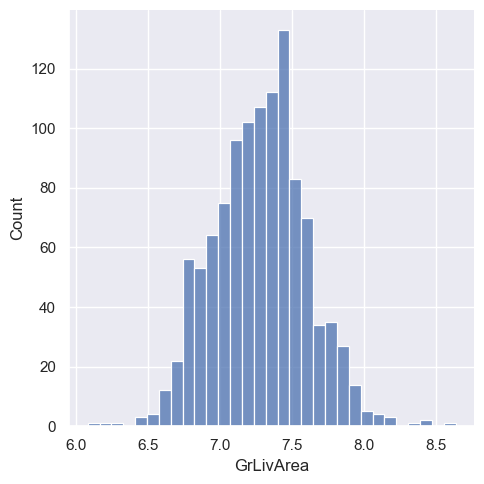

<Figure size 640x480 with 0 Axes>

In [512]:
df_train["GrLivArea"] = np.log(df_train["GrLivArea"])

sns.displot(df_train["GrLivArea"])
fig = plt.figure()

In [513]:
# Split the dataset
X = df_train.drop("SalePrice", axis=1)
y = df_train["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.20, shuffle=True
)

In [514]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score


scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

In [515]:
rf_regr = RandomForestRegressor()
rf_regr.fit(X_train, y_train)

feature_names = X_train.columns
y_pred = rf_regr.predict(X_test)

print("RMSE on Training set :", rmse_cv_train(rf_regr).mean())
print("RMSE on Test set :", rmse_cv_test(rf_regr).mean())

RMSE on Training set : 31193.67377527065
RMSE on Test set : 37751.55326456125


In [516]:
test_file_path = "./data/house-prices-advanced-regression-techniques/test.csv"
df_test = pd.read_csv(test_file_path)
ids = df_test.pop('Id')
df_test = df_test.reindex(columns=feature_names, fill_value=0)

df_test = pd.get_dummies(df_test)
preds = rf_regr.predict(df_test)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

,Id,SalePrice
0,1461,158495.38
1,1462,181427.32
2,1463,182260.72
3,1464,189517.32
4,1465,281187.54


In [517]:
sample_submission_df = pd.read_csv('./data/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission_df['SalePrice'] = preds
sample_submission_df.to_csv('./data/house-prices-advanced-regression-techniques/submission.csv', index=False)
sample_submission_df.head()

,Id,SalePrice
0,1461,158495.38
1,1462,181427.32
2,1463,182260.72
3,1464,189517.32
4,1465,281187.54
